In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the Iris Dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [3]:
# Train Classifiers

# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_test_scaled)


In [4]:
# Define Evaluation Function
def evaluate_model(name, y_true, y_pred):
    print(f"🔍 Evaluation: {name}")
    print("Accuracy:", round(accuracy_score(y_true, y_pred), 2))
    print("Precision (macro):", round(precision_score(y_true, y_pred, average='macro'), 2))
    print("Recall (macro):", round(recall_score(y_true, y_pred, average='macro'), 2))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

🔍 Evaluation: K-Nearest Neighbors
Accuracy: 1.0
Precision (macro): 1.0
Recall (macro): 1.0


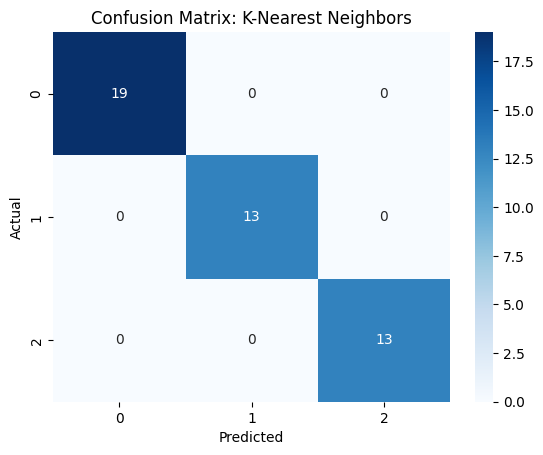

🔍 Evaluation: Naive Bayes
Accuracy: 0.98
Precision (macro): 0.98
Recall (macro): 0.97


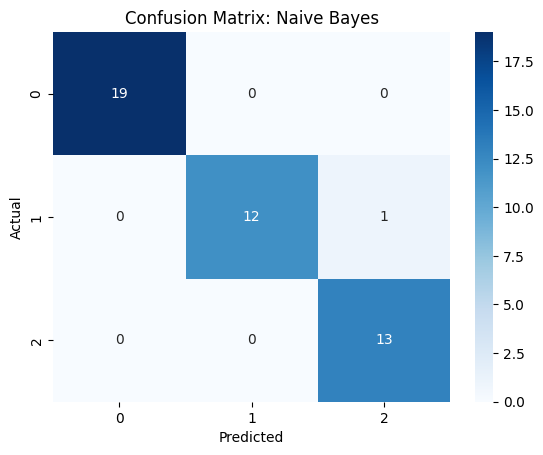

In [5]:
# Evaluate Both Models

evaluate_model("K-Nearest Neighbors", y_test, y_pred_knn)
evaluate_model("Naive Bayes", y_test, y_pred_nb)